In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1=pd.read_csv(r"C:\Users\tuma2\Downloads\healthcare-dataset-stroke-data.csv",index_col="id")
df2=pd.read_csv(r"C:\Users\tuma2\Downloads\train.csv",index_col="id")

In [ ]:
data=pd.concat([df1,df2],axis=0)

In [ ]:
data

In [ ]:
print(data.dtypes)

# data visualiation and cleaning

In [32]:
data['gender'] = data['gender'].astype('category')

In [33]:
categorical_col= ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_col= ['avg_glucose_level', 'bmi', 'age']

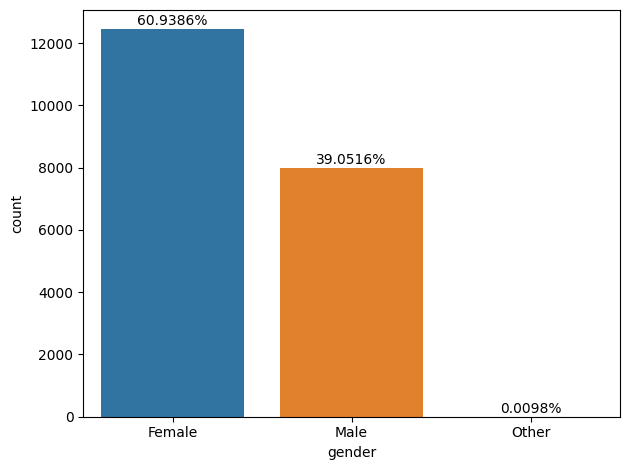

**************************************************


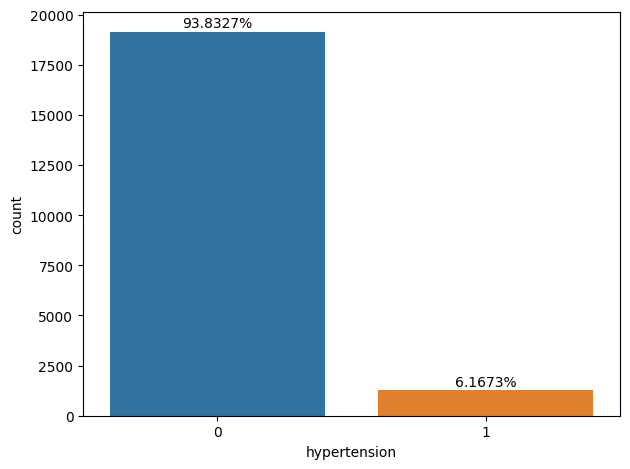

**************************************************


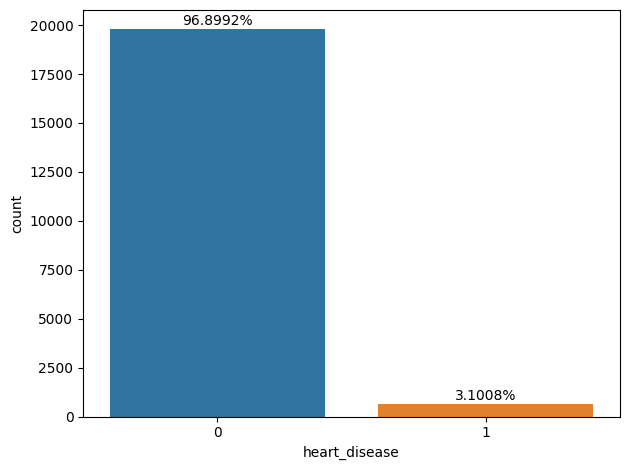

**************************************************


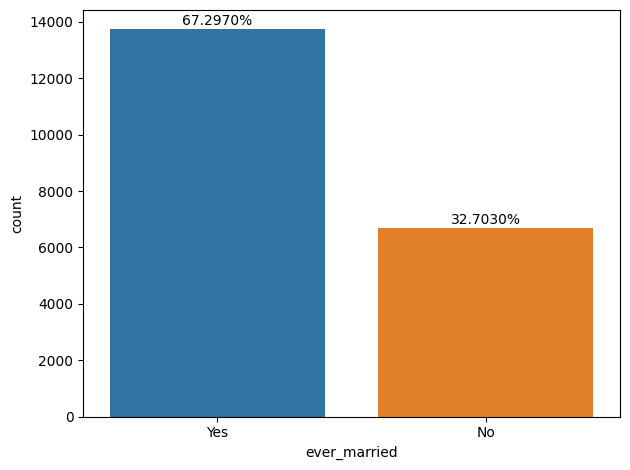

**************************************************


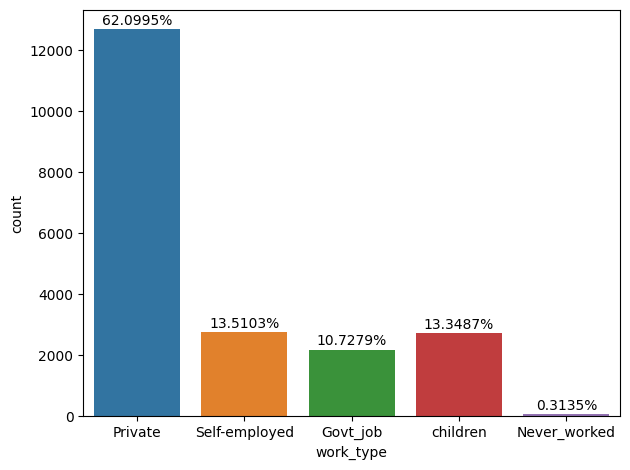

**************************************************


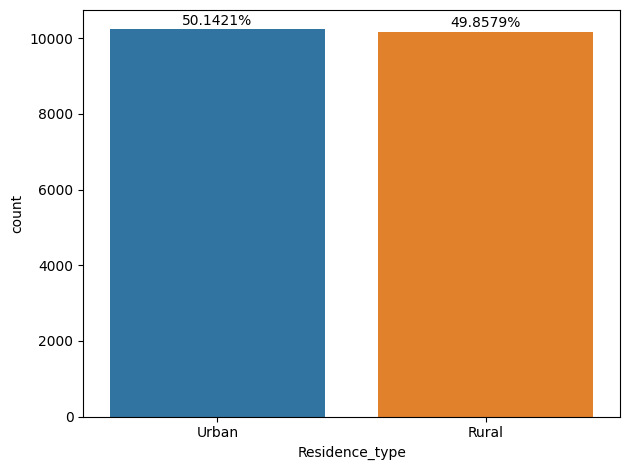

**************************************************


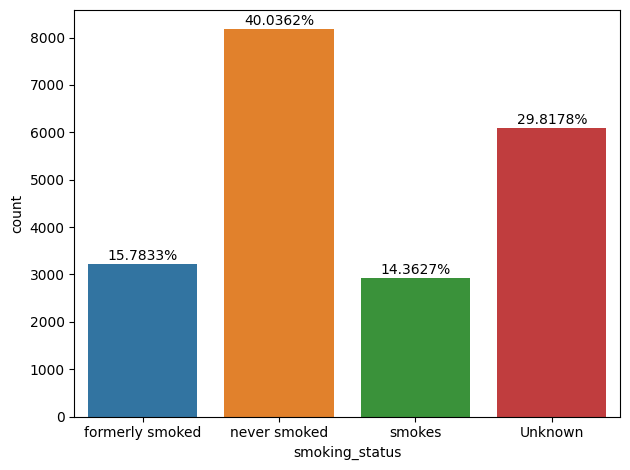

**************************************************


In [34]:
for col in categorical_col:
    ax = sns.countplot(x = col, data = data)
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.4f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.tight_layout()
    plt.show()
    print("*" * 50)

In [35]:
mean = np.mean(data["bmi"])
print(mean)

28.30227972097165


In [36]:
data=data.drop(columns=["Residence_type","work_type"])

In [37]:
data=pd.get_dummies(data,columns=["gender","smoking_status"])
data["bmi"].interpolate(method="linear",inplace=True)

In [38]:
int_marr={"ever_married":{"Yes":1,"No":0}}
data.replace(int_marr,inplace=True)

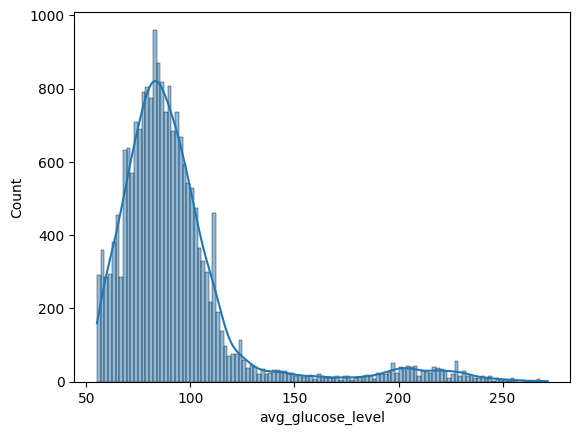

**************************************************


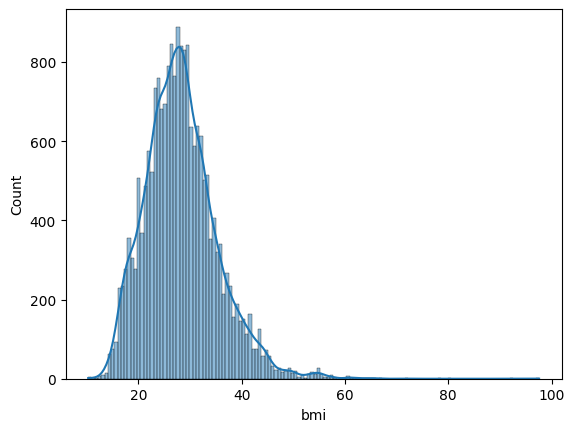

**************************************************


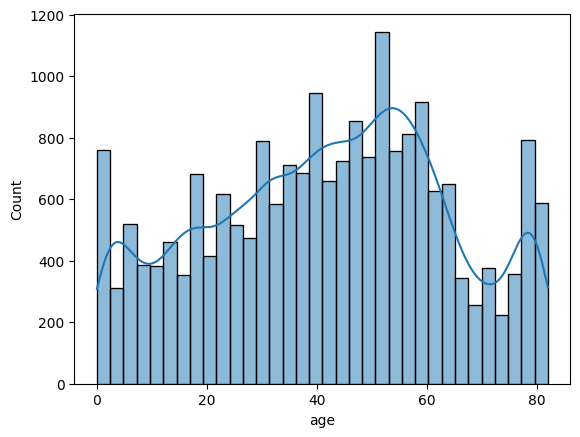

**************************************************


In [39]:
for col in numerical_col:
    sns.histplot(x = col, data = data, kde = True)
    plt.show()
    print("*" * 50)

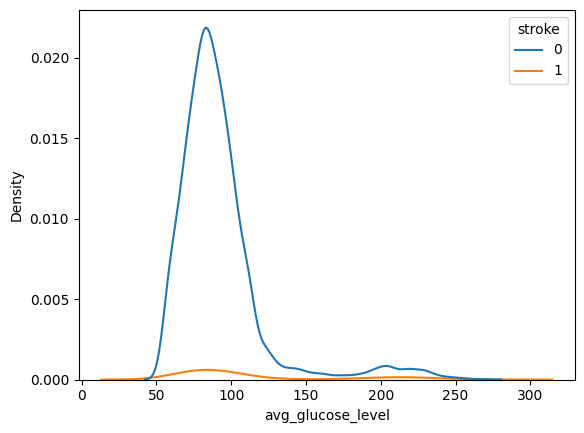

**************************************************


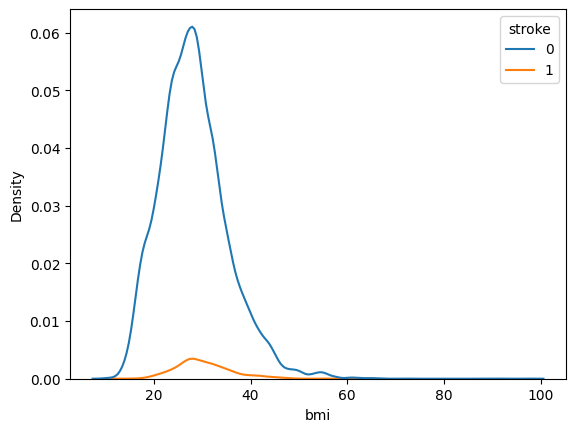

**************************************************


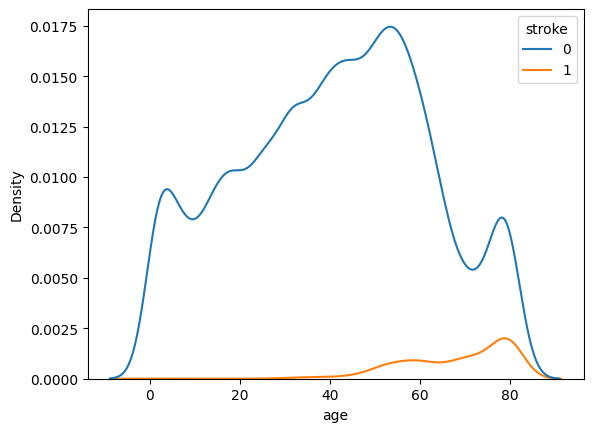

**************************************************


In [40]:
for col in numerical_col:
    sns.kdeplot(x = col, data = data, hue='stroke')
    plt.show()
    print("*" * 50)

In [41]:
titles=list(data.columns)
titles[0],titles[7]=titles[7],titles[0]
data=data[titles]

In [42]:
y=data["stroke"]
x=data[["hypertension","bmi","heart_disease","gender_Female","gender_Male","gender_Other","ever_married","avg_glucose_level","age","smoking_status_Unknown","smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes"]]

# scaling and fitting data

In [43]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [44]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(Xtrain,ytrain)

GradientBoostingClassifier()

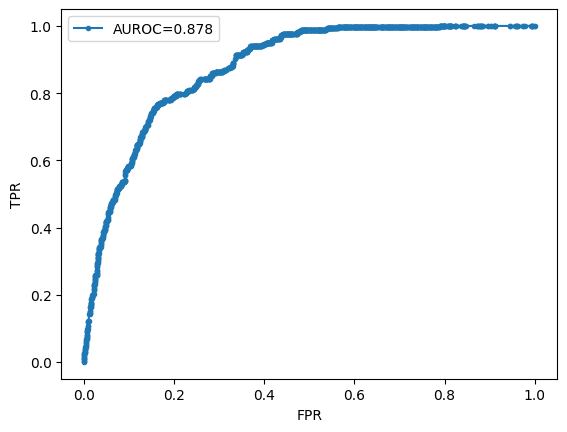

In [49]:
pred3=gb.predict_proba(Xtest)
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(ytest,pred3[:,1])
fpr,tpr,_=roc_curve(ytest,pred3[:,1])
plt.plot(fpr,tpr,marker=".",label='AUROC=%0.3f'%auc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()


# predicting final results

In [21]:
testD=pd.read_csv(r"C:\Users\tuma2\Downloads\test.csv",index_col="id")
testD=testD.drop(columns=["Residence_type","work_type"])
testD=pd.get_dummies(testD,columns=["gender","smoking_status"])
testD["bmi"].interpolate(method="linear",inplace=True)
int_marr={"ever_married":{"Yes":1,"No":0}}
testD.replace(int_marr,inplace=True)

In [22]:
titles=list(testD.columns)
titles[0],titles[7]=titles[7],titles[0]
testD=testD[titles]
xt=testD[["hypertension","bmi","heart_disease","gender_Female","gender_Male","gender_Other","ever_married","avg_glucose_level","age","smoking_status_Unknown","smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes"]]

In [23]:
xts=sc.transform(xt)

In [24]:
result=gb.predict(xts)

In [25]:
import csv
idr=testD.index
with open('project.csv','w+') as file:
    myfile=csv.writer(file)
    myfile.writerow(['id','stroke'])
    for i in range(len(idr)):
        myfile.writerow([idr[i],result[i]])